# Renzo Bechler

#  Laboratorio 1 - Materia Analisis de series temporales

1. Levantar los datos desde el archivo dataset/Telefonia_movil.csv. Los mismos fueron extraídos de http://datosabiertos.enacom.gob.ar/visualizations/29890/trafico-de-suscriptores-de-telefonia-movil-miles-de-minutos/ 

2. Explorar los datos, visualizarlos

3. Implementar dos modelos (como ser Random Walk (Naïve) y Exponential Smoothing)

4. Visualizar los resultados y evaluarlos, comparando ambas implementaciones


In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
data_movil = pd.read_csv('../datasets/Telefonia_movil.csv',  thousands='.')

In [3]:
data_movil.sample(10)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
4,2014,1,10128751,5799223,15927974,Ene-Mar 2013
10,2015,3,11766711,7198826,18965537,Jul-Sept 2015
5,2014,2,10821463,6438071,17259534,Abr-Jun 2014
8,2015,1,10273637,6480172,16753809,Ene-Mar 2015
3,2013,4,9809515,6250549,16060064,Oct-Dic 2013
12,2016,1,11230991,6656647,17887638,Ene-Mar 2016
9,2015,2,11226576,6579819,17806395,Abr-Jun 2015
1,2013,2,9512689,7108640,16621329,Abr-Jun 2013
16,2017,1,14630269,6209983,20840252,Ene-Mar 2017
18,2017,3,15106275,6308373,21414647,Jul-Sept 2017


In [4]:
data_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
Año                                   22 non-null int64
Trimestre                             22 non-null int64
Minutos pospago salientes (miles)     22 non-null int64
Minutos prepago salientes (miles)     22 non-null int64
Total de minutos salientes (miles)    22 non-null int64
Periodo                               22 non-null object
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [5]:
# Se renombran las columnas por comodidad
data_movil = data_movil.rename(index=str, columns={"Minutos pospago salientes (miles)": "min_pos_out", 
                                                   "Minutos prepago salientes (miles)": "min_pre_out",
                                                  "Total de minutos salientes (miles)": "tot_min_out"})

## Indexamos la serie por trimestre

In [6]:
data_movil.index = pd.PeriodIndex((data_movil['Año'].astype(str) + "Q" + data_movil['Trimestre'].astype(str)), freq='Q')

In [7]:
data_movil.sample(5)

,Año,Trimestre,min_pos_out,min_pre_out,tot_min_out,Periodo
2017Q2,2017,2,15315167,6293563,21608730,Abr-Jun 2017
2013Q2,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2013Q4,2013,4,9809515,6250549,16060064,Oct-Dic 2013
2014Q3,2014,3,11524344,7179152,18703495,Jul-Sept 2014
2017Q4,2017,4,14164552,5380710,19545262,Oct-Dic 2017


# Exploracion de datos

In [8]:
data_movil.describe()

,Año,Trimestre,min_pos_out,min_pre_out,tot_min_out
count,22.000000,22.000000,2.200000e+01,2.200000e+01,2.200000e+01
mean,2015.272727,2.409091,1.209691e+07,6.604273e+06,1.870118e+07
std,1.638287,1.140555,2.077349e+06,5.251805e+05,1.990543e+06
min,2013.000000,1.000000,8.785943e+06,5.380710e+06,1.536806e+07
25%,2014.000000,1.250000,1.044198e+07,6.291007e+06,1.735731e+07
50%,2015.000000,2.000000,1.164553e+07,6.580968e+06,1.883452e+07
75%,2016.750000,3.000000,1.408623e+07,7.100940e+06,1.974379e+07
max,2018.000000,4.000000,1.596076e+07,7.335154e+06,2.289966e+07


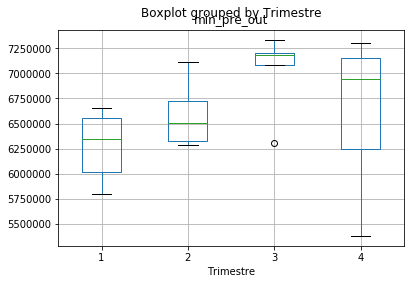

In [9]:
data_movil.boxplot(column='min_pre_out',by='Trimestre');

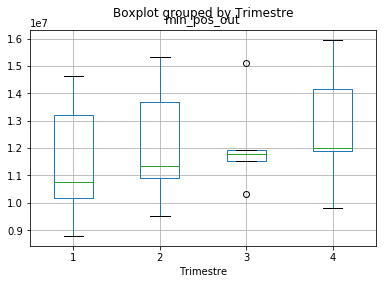

In [10]:
data_movil.boxplot(column='min_pos_out',by='Trimestre');

Se observa que existe una tendencia creciente en planes pos pagos, en el caso de planes pre pagos hay una caida a partir de Q3. Por algún motivo existe muy poca desviación en cuanto a la cantidad de minutos salientes en ambos planes para Q3.

## Grafico de las series

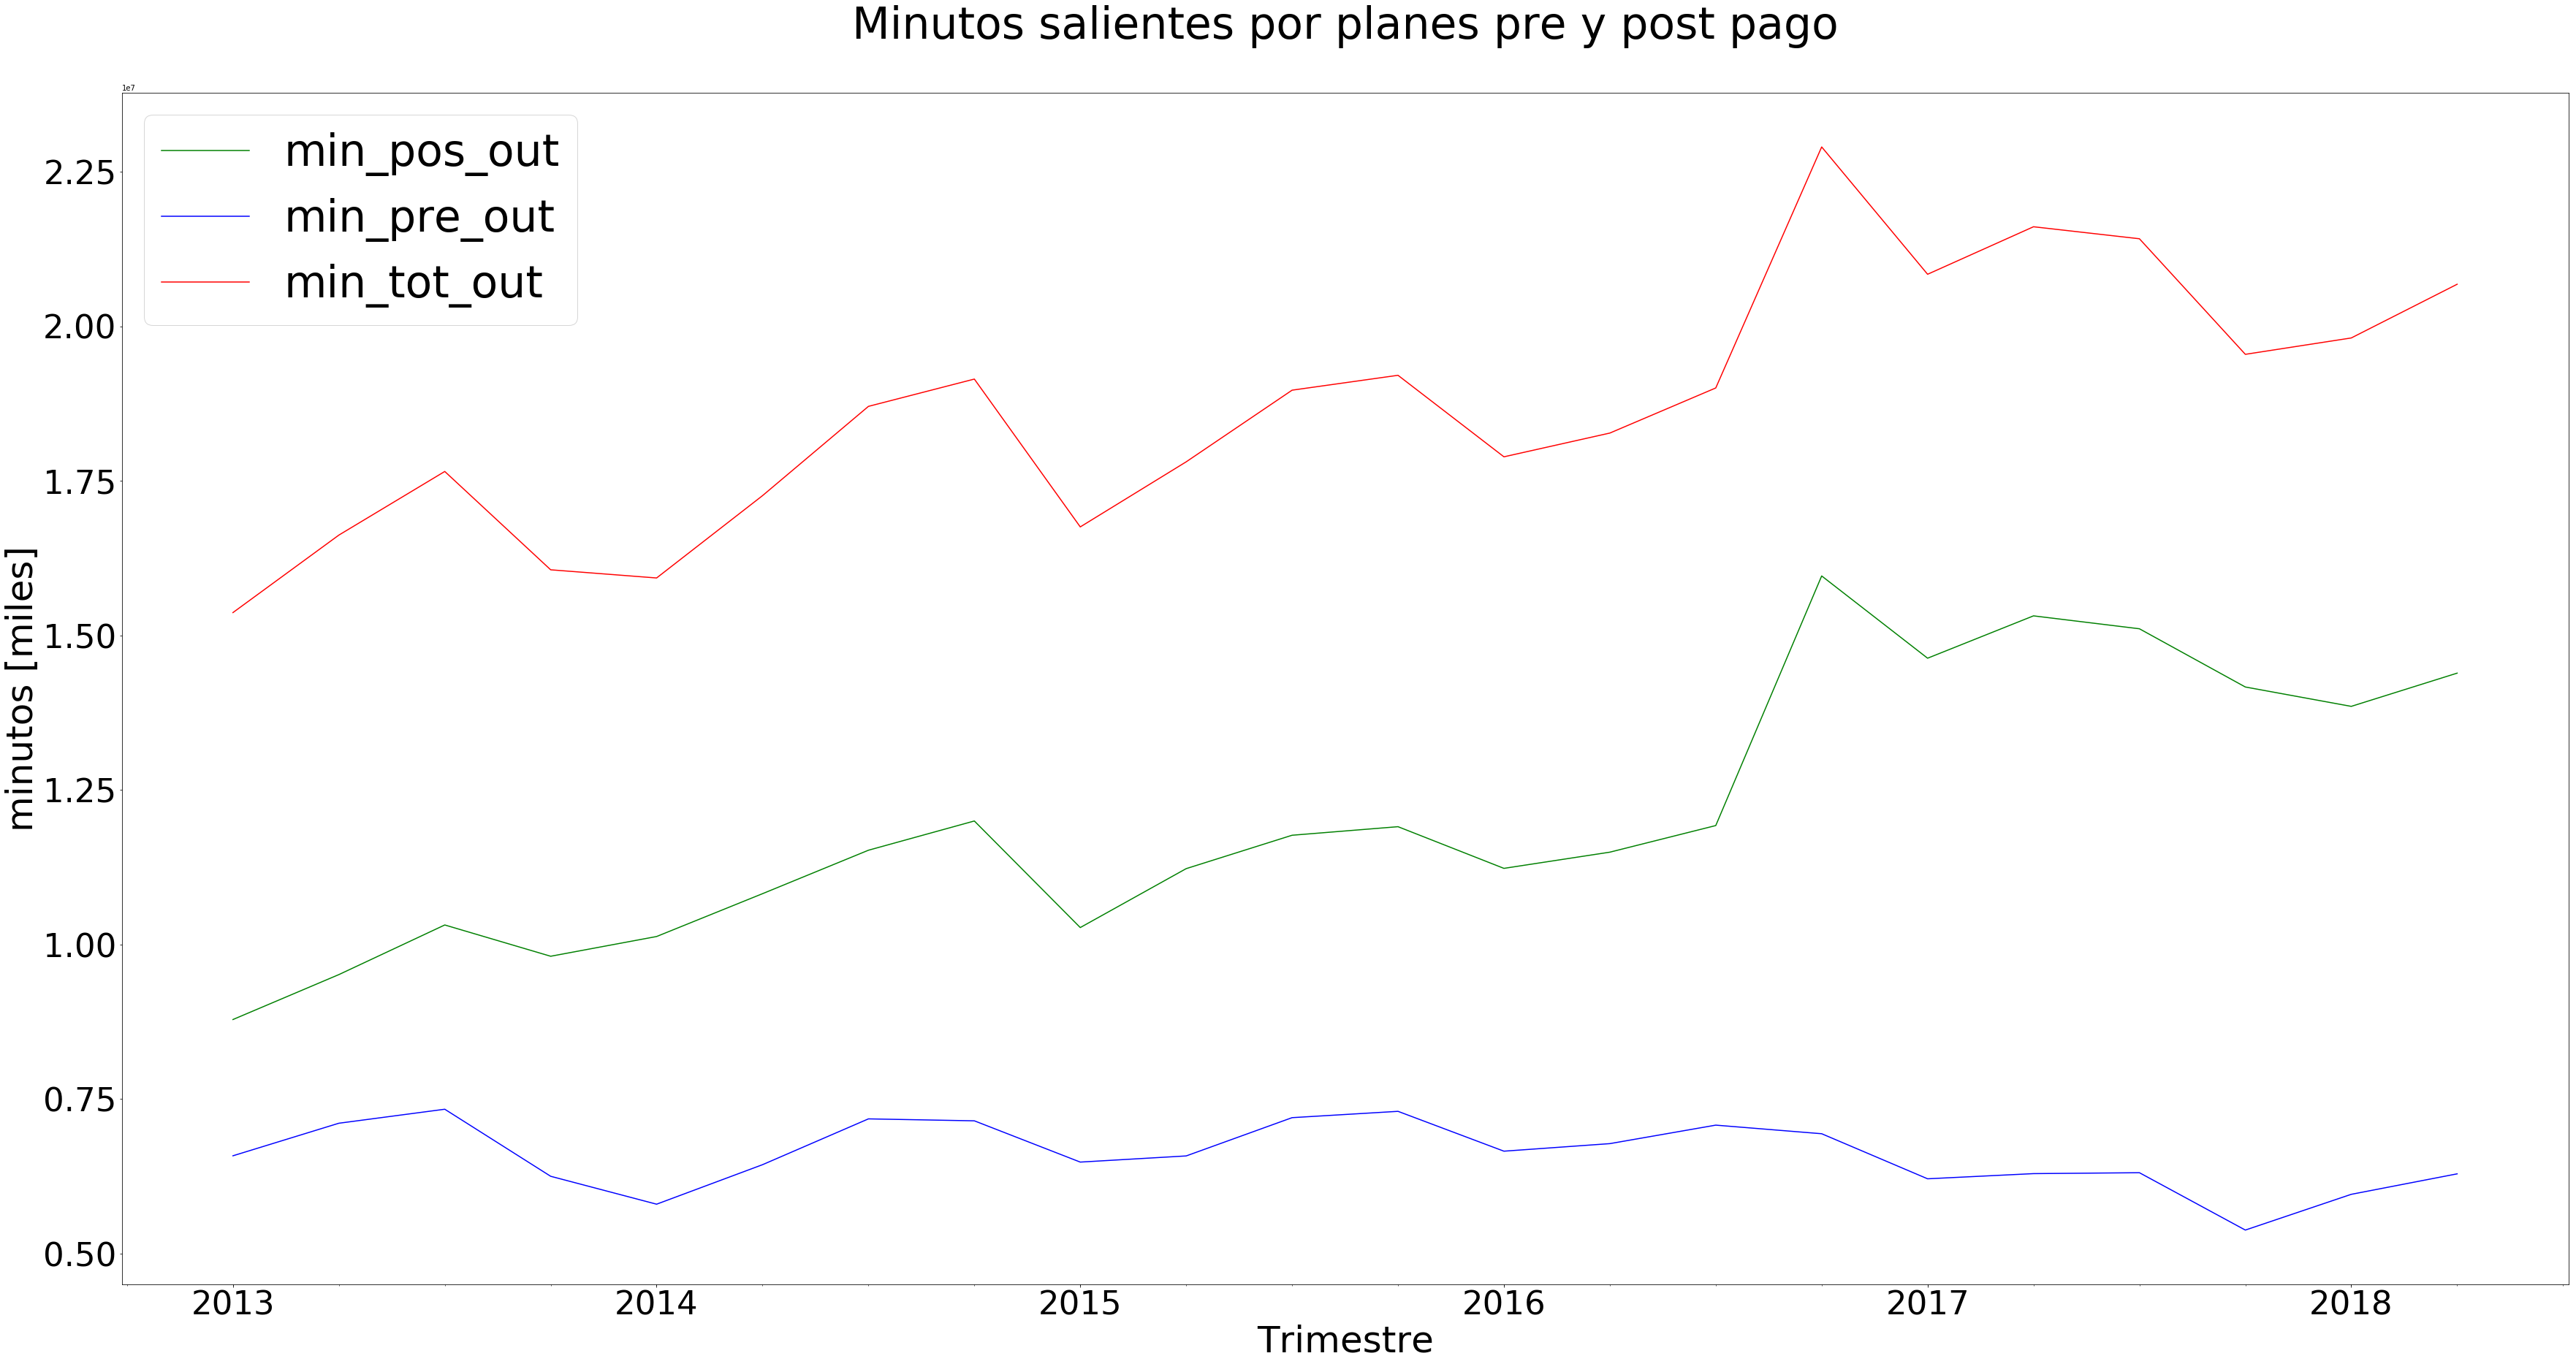

In [11]:
from matplotlib import pyplot as plt
max_year=2018
plt.figure(figsize=(60,30))
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
data_movil[data_movil["Año"] <= max_year].min_pos_out.plot(color='green', label='min_pos_out')
data_movil[data_movil["Año"] <= max_year].min_pre_out.plot(color='blue', label='min_pre_out')
data_movil[data_movil["Año"] <= max_year].tot_min_out.plot(color='red', label='min_tot_out')

plt.title("Minutos salientes por planes pre y post pago\n",fontsize=60)
plt.xlabel('Trimestre',fontsize=50)
plt.ylabel('minutos [miles]', fontsize=50)
plt.legend(prop={'size': 60})
plt.show()

## Comparación de series por año

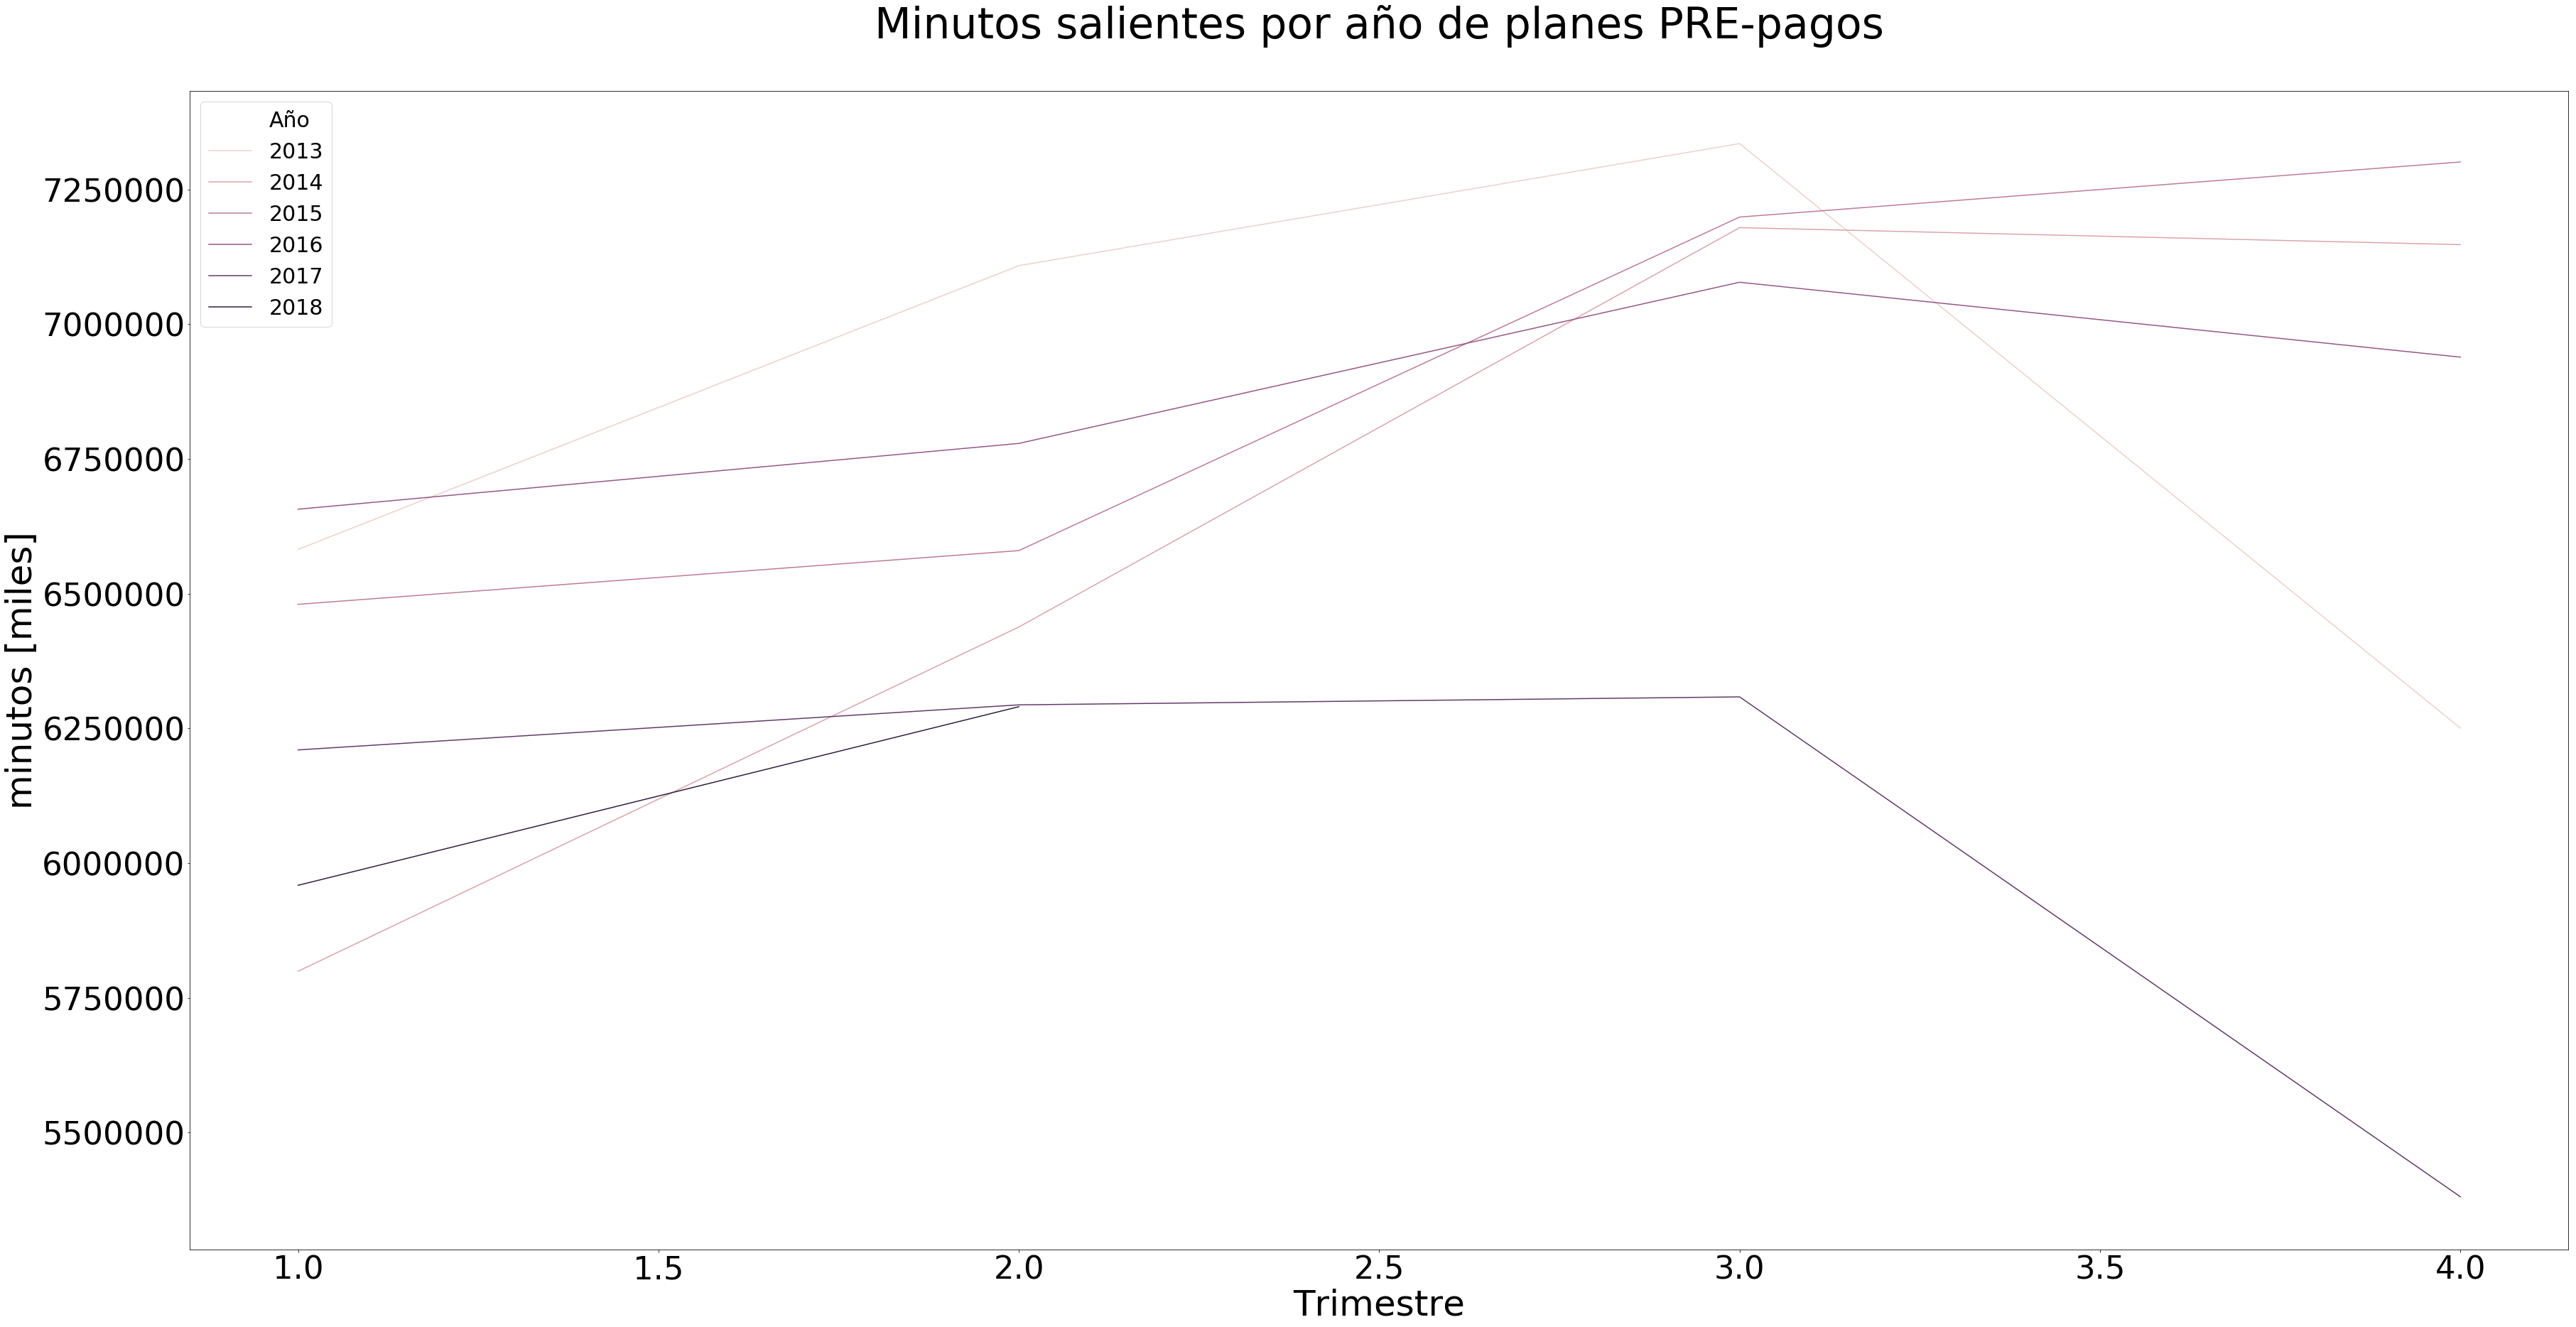

In [12]:
import seaborn as sns
plt.figure(figsize=(60,30))
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)

sns.lineplot('Trimestre','min_pre_out',hue='Año',data=data_movil, legend='full');

plt.title("Minutos salientes por año de planes PRE-pagos\n",fontsize=60)
plt.xlabel('Trimestre',fontsize=50)
plt.ylabel('minutos [miles]', fontsize=50)
plt.legend(prop={'size': 30})
plt.show()

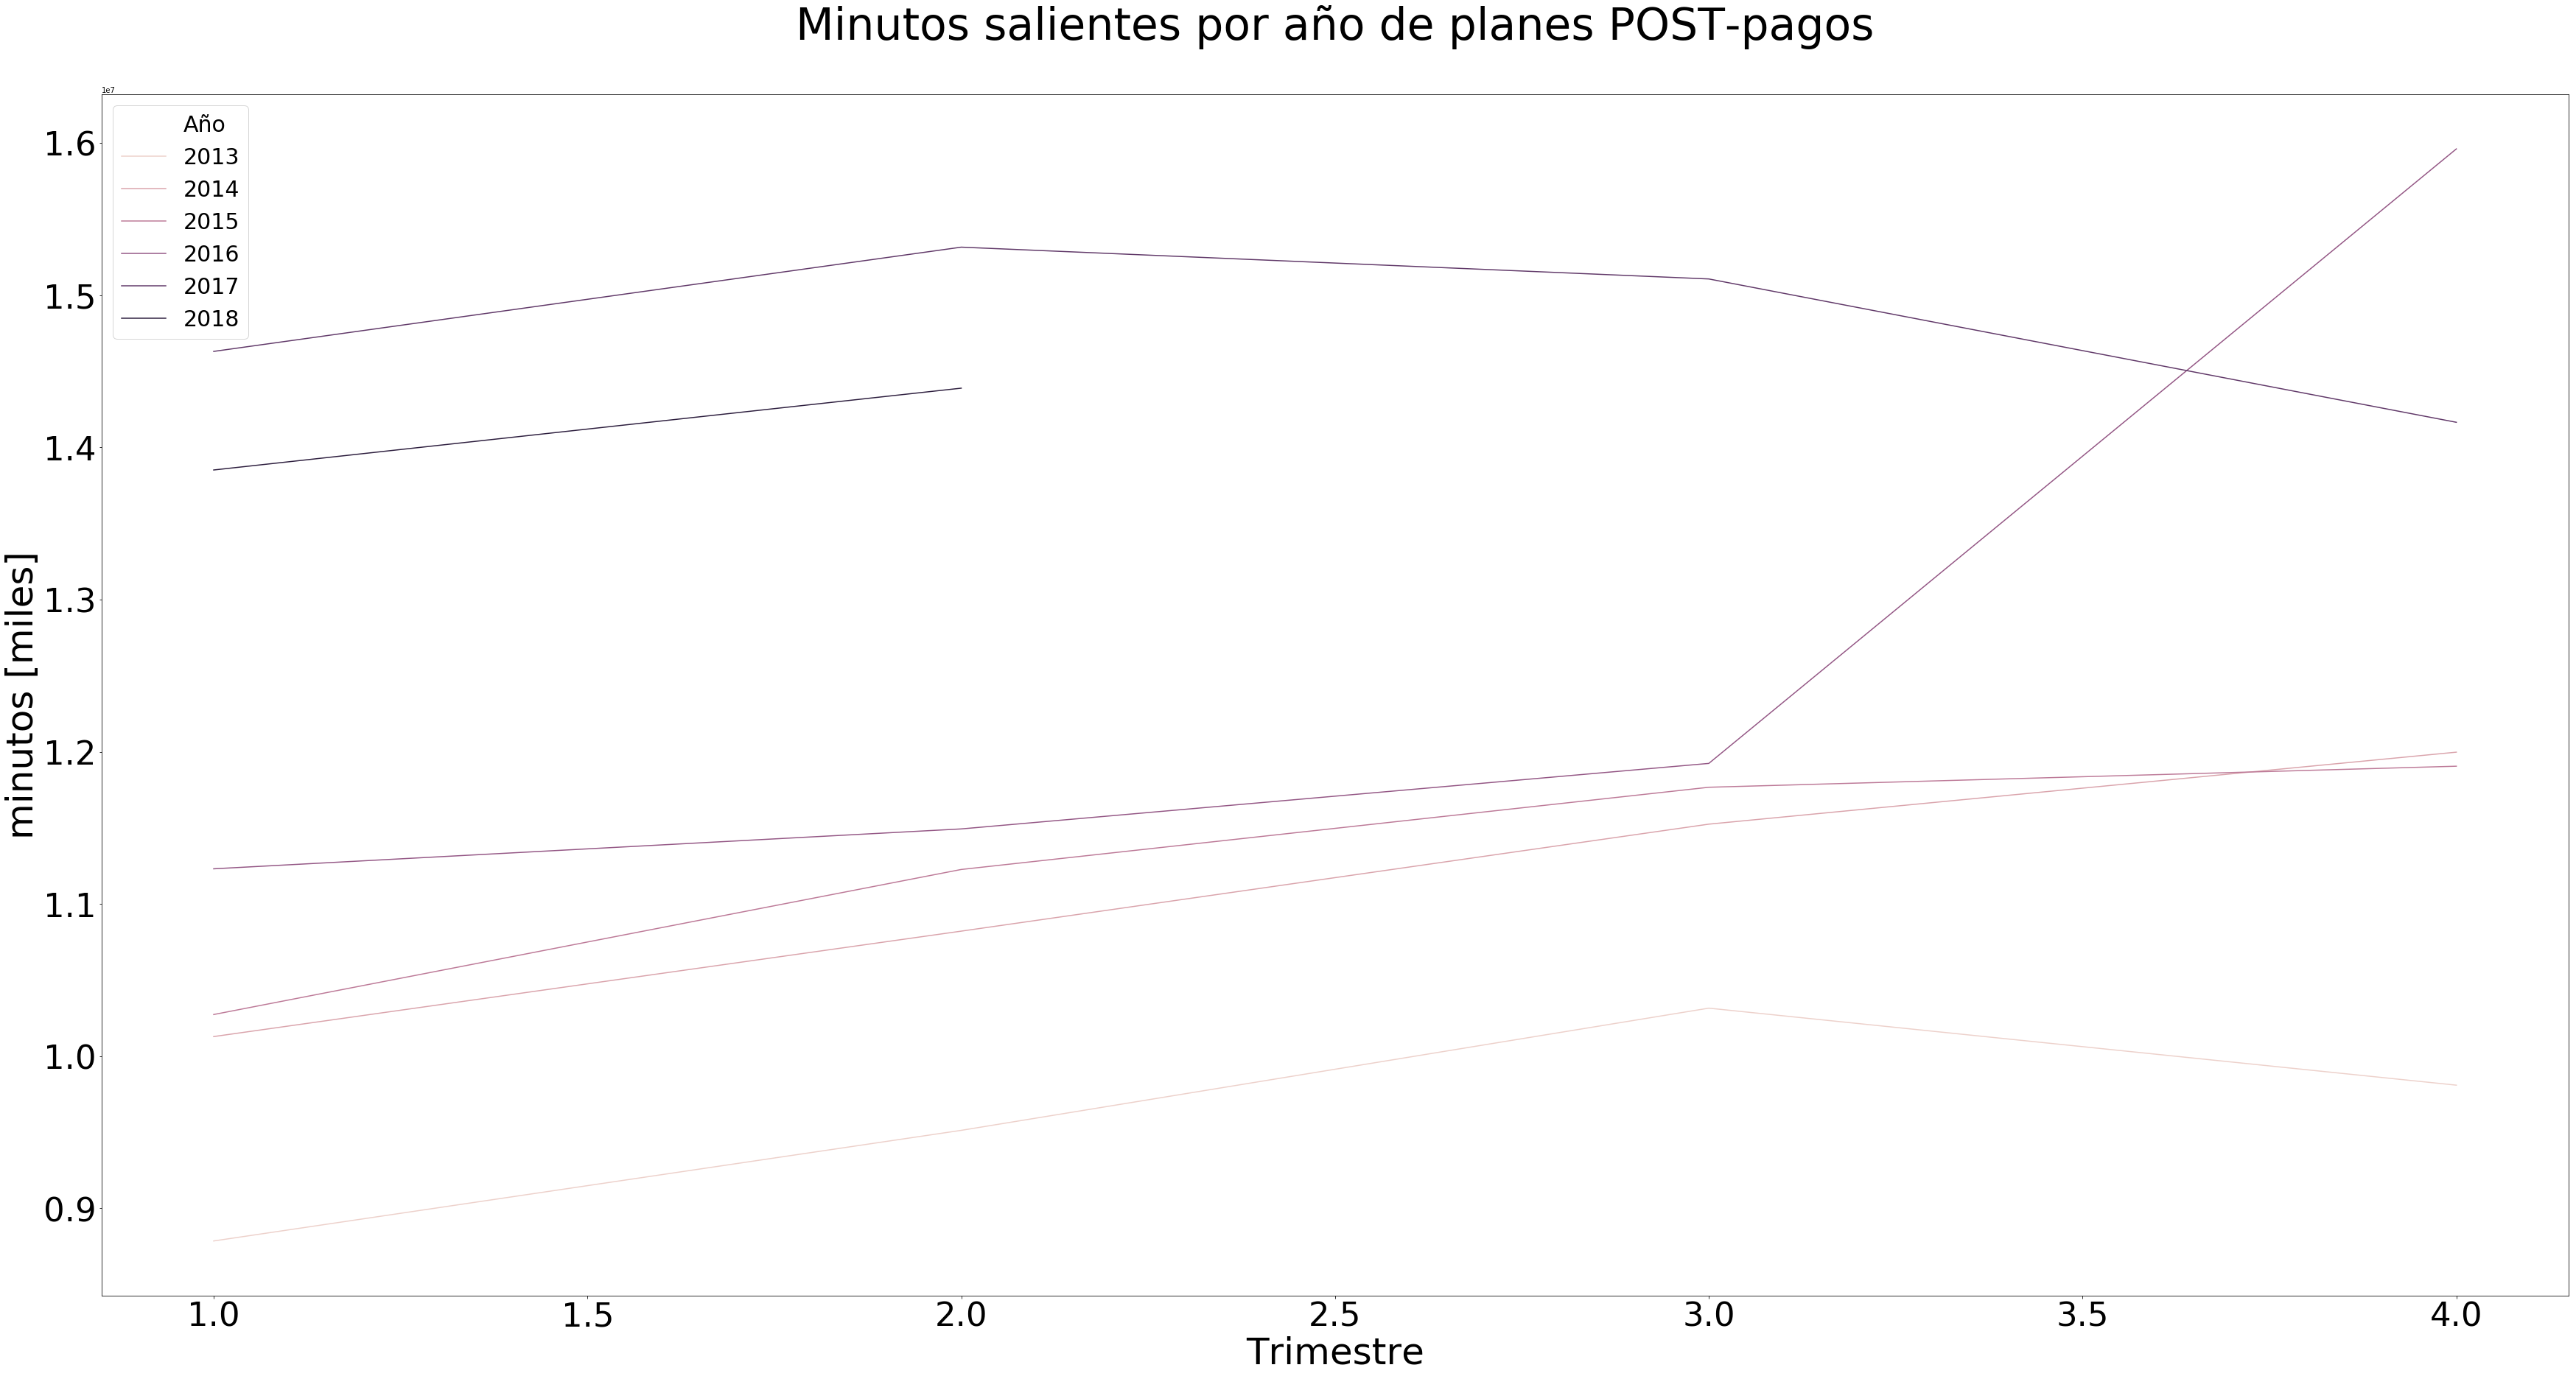

In [13]:
plt.figure(figsize=(60,30))
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)

sns.lineplot('Trimestre','min_pos_out',hue='Año',data=data_movil, legend='full');

plt.title("Minutos salientes por año de planes POST-pagos\n",fontsize=60)
plt.xlabel('Trimestre',fontsize=50)
plt.ylabel('minutos [miles]', fontsize=50)
plt.legend(prop={'size': 30})
plt.show()

Se puede observar que a partir de Q3 existe una caída en el tiempo de llamadas realizadas tambien evaluando la evoluciono anual de ambas series se observa una tendencia a utilizar mas planes pos pagos que pre pagos.

### Lag plots

In [14]:
from pandas.plotting import lag_plot


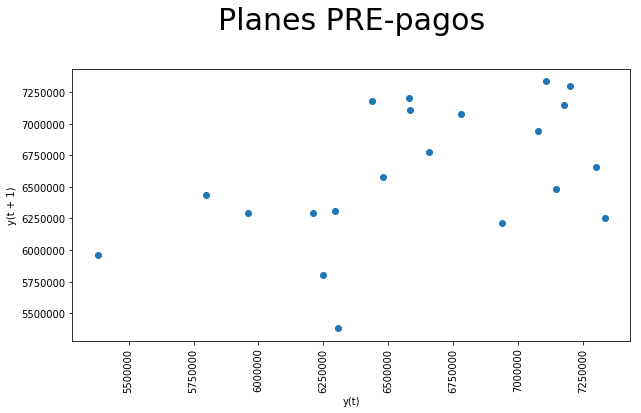

In [15]:
plt.figure(figsize=(10,5))
plt.title("Planes PRE-pagos\n",fontsize=30)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
lag_plot(data_movil.min_pre_out);


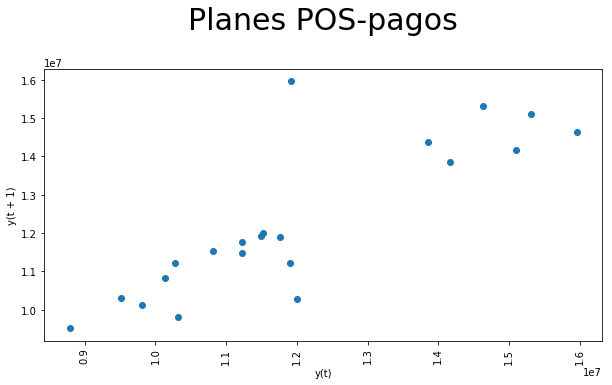

In [16]:
plt.figure(figsize=(10,5))
plt.title("Planes POS-pagos\n",fontsize=30)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
lag_plot(data_movil.min_pos_out);

Se puede observar un poco de **Tendencia** para ambos planes de pago, observandose una autocorrelación mayor para planes pos pagos.

# Predicciones

## Random walk

### Prepagos

In [17]:
# Especificamos el 'horizonete' de la serie
import numpy as np
h = 3
y = data_movil.min_pre_out
# Se crea una serie indexada por trimestres desde la observacion previa a la actual
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred_naive_pre=pd.Series(np.repeat(y.iloc[-1], h), index=test)
pred_naive_pre

2018Q3    6290155
2018Q4    6290155
2019Q1    6290155
Freq: Q-DEC, dtype: int64

Se calcula la std de los errores a fin de calcular los intervalos de predicción

In [18]:
resid=y-y.shift(1) # Se laggea la seria una unidad de tiempo
sigma = resid.std()
round(sigma,3)

542855.357

In [19]:
# Calculamos los intervalos
intv = pd.concat([pred_naive_pre-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred_naive_pre+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2018Q3,5226178.052,7354131.948
2018Q4,4785464.370,7794845.630
2019Q1,4447292.868,8133017.132


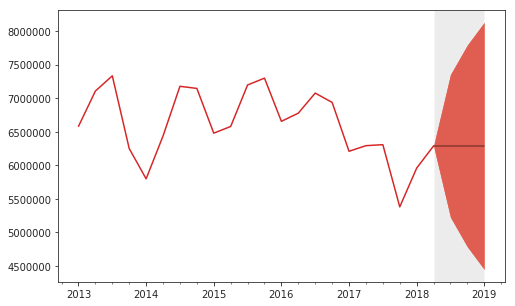

In [21]:
from plotting import fanchart

point_pred = (intv[0]+intv[1])/2

fig, ax = fanchart(y,point_pred,intv,intv,intv)

plt.show()

### Postpagos

In [22]:
# Especificamos el 'horizonete' de la serie
import numpy as np
h = 3
y=data_movil.min_pos_out
# Se crea una serie indexada por trimestres desde la observacion previa a la actual
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred_naive_pos=pd.Series(np.repeat(y.iloc[-1], h), index=test)
pred_naive_pos

2018Q3    14388755
2018Q4    14388755
2019Q1    14388755
Freq: Q-DEC, dtype: int64

Se calcula la std de los errores a fin de calcular los intervalos de predicción

In [23]:
resid_2=y-y.shift(1) # se laggea la serie una unidad de tiempo
sigma = resid_2.std()
round(sigma,3)

1139932.612

In [24]:
# Calculamos los intervalos
intv_2 = pd.concat([pred_naive_pre-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred_naive_pre+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv_2.round(3)

,0,1
2018Q3,4055928.135,8.524382e+06
2018Q4,3130481.066,9.449829e+06
2019Q1,2420360.555,1.015995e+07


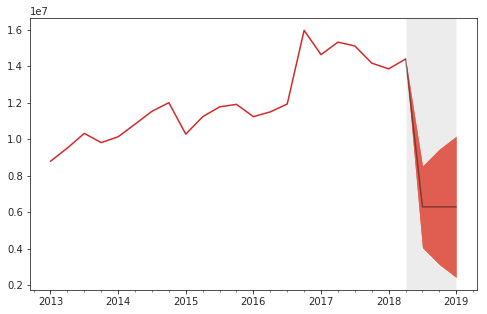

In [25]:
from plotting import fanchart

point_pred = (intv_2[0]+intv_2[1])/2

fig, ax = fanchart(y,point_pred,intv_2,intv_2,intv_2)

plt.show()

### Simple exponential smoothing

In [26]:
import statsmodels.api as sm

### Prepagos

In [27]:
model_pre = sm.tsa.SimpleExpSmoothing(data_movil.min_pre_out).fit()
fitted_pre = model_pre.fittedvalues

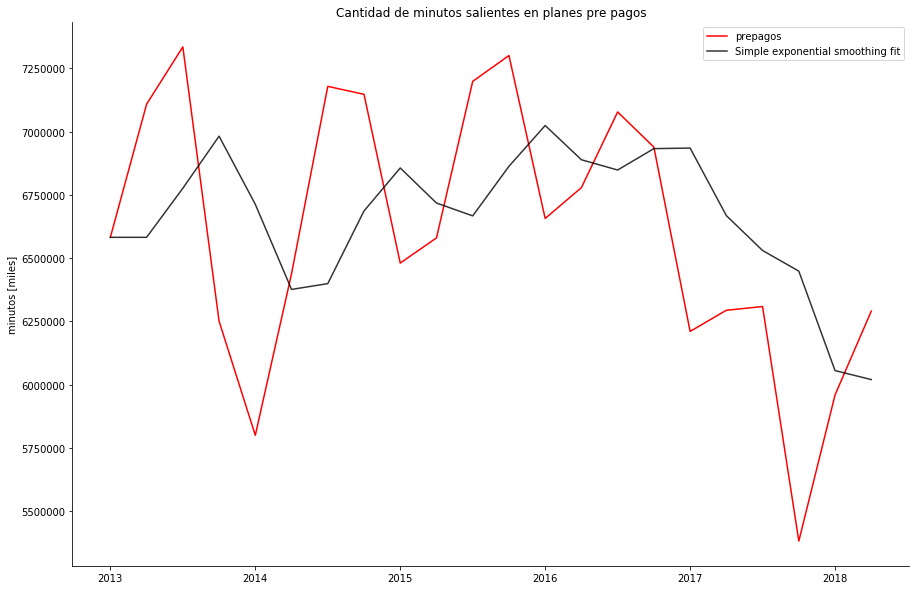

In [28]:
fig, ax= plt.subplots(figsize=(15,10))
data_movil.min_pre_out.plot(color='red', label='prepagos')
fitted_pre.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('minutos [miles]')
ax.set_title('Cantidad de minutos salientes en planes pre pagos')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

### Postpagos

In [29]:
model_pos = sm.tsa.SimpleExpSmoothing(data_movil.min_pos_out).fit()
fitted_pos = model_pos.fittedvalues

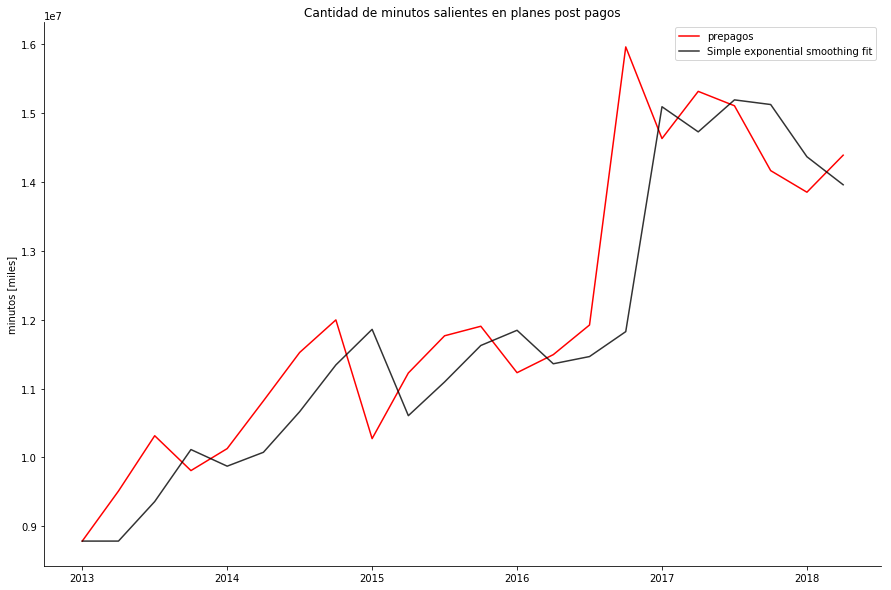

In [30]:
fig, ax= plt.subplots(figsize=(15,10))
data_movil.min_pos_out.plot(color='red', label='prepagos')
fitted_pos.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('minutos [miles]')
ax.set_title('Cantidad de minutos salientes en planes post pagos')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

## Evaluación de modelos

Dado que el método *Exponential smoothing* predice mejor nuestra serie escojeremos este modelo y lo evaluaremos.

### Prepagos

In [39]:
# Calculo de residuos
resid=data_movil.min_pre_out-fitted_pre
print(resid)

2013Q1    0.000000e+00
2013Q2    5.265230e+05
2013Q3    5.590548e+05
2013Q4   -7.315177e+05
2014Q1   -9.133372e+05
2014Q2    6.200345e+04
2014Q3    7.802411e+05
2014Q4    4.612618e+05
2015Q1   -3.761347e+05
2015Q2   -1.379118e+05
2015Q3    5.319048e+05
2015Q4    4.381529e+05
2016Q1   -3.676639e+05
2016Q2   -1.101238e+05
2016Q3    2.295542e+05
2016Q4    6.035572e+03
2017Q1   -7.250971e+05
2017Q2   -3.743760e+05
2017Q3   -2.216380e+05
2017Q4   -1.067645e+06
2018Q1   -9.629505e+04
2018Q2    2.706201e+05
Freq: Q-DEC, dtype: float64


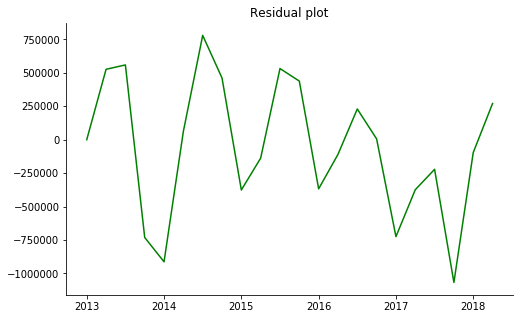

In [41]:
# Graficamos los residuos
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color='green')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

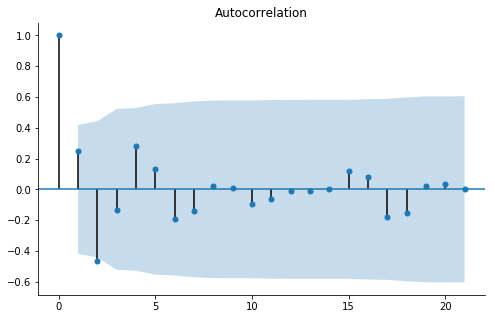

In [44]:
# Ahora observaremos la autocorrelacion de los residuos
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, ax=ax)
sns.despine()
plt.show()

En esta serie tanto en el gráfico de residuos como en el de autocorrelación se ve que los residuos tienen ciertos patrones. 
En el gráfico de residuos se nota cierto grado de **tendencia** y de **estacionalidad**. En el gráfico ACF, se observa nuevamente lo mismo, lo cual significa que nuestro modelo no lo esta describiendo.

### Pos pagos

In [45]:
# Calculo de residuos
resid_2=data_movil.min_pos_out-fitted_pos
print(resid_2)

2013Q1   -1.949561e+00
2013Q2    7.267456e+05
2013Q3    9.554759e+05
2013Q4   -3.052344e+05
2014Q1    2.551097e+05
2014Q2    7.463076e+05
2014Q3    8.596717e+05
2014Q4    6.535932e+05
2015Q1   -1.586381e+06
2015Q2    6.196586e+05
2015Q3    6.703182e+05
2015Q4    2.791882e+05
2016Q1   -6.154277e+05
2016Q2    1.327417e+05
2016Q3    4.582515e+05
2016Q4    4.133647e+06
2017Q1   -4.620639e+05
2017Q2    5.878237e+05
2017Q3   -8.539696e+04
2017Q4   -9.596639e+05
2018Q1   -5.149124e+05
2018Q2    4.293238e+05
Freq: Q-DEC, dtype: float64


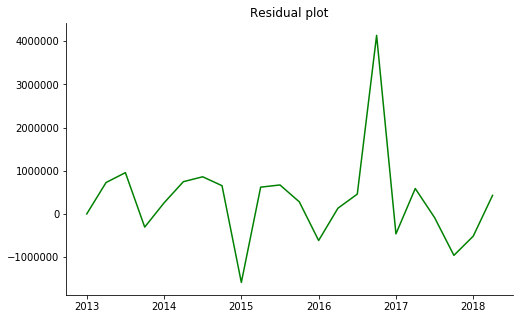

In [46]:
# Graficamos los residuos
fig, ax= plt.subplots(figsize=(8,5))
resid_2.plot(color='green')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

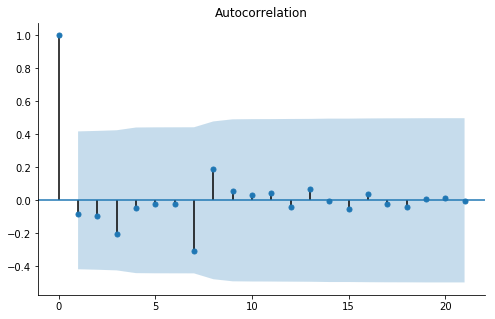

In [47]:
# Ahora observaremos la autocorrelacion de los residuos
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid_2, ax=ax)
sns.despine()
plt.show()

Nuestras predicciones para la serie que describe los planes pos pagos parece ser mucho mejor que la de los planes pre pagos.
A primera vista no se observa que tenga patrones de estacionalidad, pero se puede observar algún grado de estacionalidad en los residuos.

Si bien exponential smoothing describe mejor nuestra serie, ninguno de los modelos que utilizamos describen bien los patrones de estacionalidad ni de tendencia. Se podría utilizar algún otro modelo como Holt winters para poder captar estos patrones.